<a href="https://colab.research.google.com/github/shardul28/political-stance-detection/blob/Mscproject/modelling_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import gensim

import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import matplotlib.pyplot as plt
%matplotlib inline

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pickle

In [ ]:
infile = open('/content/drive/MyDrive/project_data/model_data.pkl','rb')
df = pickle.load(infile)

In [ ]:
# scraped_data = pd.read_csv('./republic/republic_articles_final_v2.csv')
scraped_data = df
scraped_data.head()

,text,url,title,content,bias,retweet_count,favorite_count,source_name,source,clean_content,text_lemmatized,clean_text_lemmatized,tags,polarity,polarity_score,subjectivity,subjectivity_score
0,"RT @ndtvfeed: US Has Lost AI Battle To China, ...",https://www.ndtv.com/world-news/us-has-lost-ar...,"US Has Lost AI Battle To China, Pentagon's Ex-...",china has won the artificial intelligence batt...,0,5.0,0.0,ndtv,0,china artificial intelligence battle united st...,"[china, artificial, intelligence, battle, unit...",china artificial intelligence battle united he...,"[suspensions, dismissals and resignations, arm...",-0.023085,Negative,0.394306,Low subjectivity
1,"Karnataka Minister's Bizarre Remarks On ""Moder...",https://www.ndtv.com/india-news/karnataka-mini...,"Karnataka Minister's Bizarre Remarks On ""Moder...",karnataka health minister dr k sudhakar on sun...,0,13.0,71.0,ndtv,0,karnataka health minister dr k sudhakar claime...,"[karnataka, health, minister, dr, k, sudhakar,...",karnataka health minister dr k sudhakar claime...,[medicine and health],0.118816,Positive,0.452806,Low subjectivity
2,Agitation Will Continue Till Demands Are Met: ...,https://ndtv.com/india-news/agitation-will-con...,Agitation Will Continue Till Demands Are Met: ...,the farmers' agitation will continue till all ...,0,23.0,257.0,ndtv,0,farmers agitation continue till demands met re...,"[farmer, agitation, continue, till, demand, me...",farmer agitation continue till demand met repe...,"[agriculture, farmers]",0.062500,Positive,0.300000,Low subjectivity
3,"Petrol, Diesel Prices Hit New Highs https://t....",https://www.ndtv.com/business/petrol-and-diese...,"Petrol, Diesel Prices Hit New Highs. Check Lat...","petrol, diesel price today: petrol prices touc...",0,17.0,119.0,ndtv,0,petrol diesel price petrol prices touched high...,"[petrol, diesel, price, petrol, price, touched...",petrol diesel price petrol price touched high ...,"[oil (petroleum) and gasoline, prices (fares, ...",-0.012500,Negative,0.531250,High subjectivity
4,#MaharashtraBandh Today In Solidarity With Far...,https://www.ndtv.com/india-news/maharashtra-ba...,Maharashtra Bandh Live Updates: Bus Services A...,bus services were affected across maharashtra ...,0,21.0,78.0,ndtv,0,bus services affected maharashtra shops commer...,"[bus, service, affected, maharashtra, shop, co...",bus service affected maharashtra shop commerci...,[],-0.077778,Negative,0.233333,Low subjectivity


In [ ]:
word_tokenizer=RegexpTokenizer(r'\w+')
wordnet_lemmatizer = WordNetLemmatizer()
stopwords_nltk=set(stopwords.words('english'))

In [ ]:
def tokenize_text(version_desc: str)-> list:
    words = word_tokenizer.tokenize(wordnet_lemmatizer.lemmatize(version_desc.lower()))
    tokens = {word for word, tag in nltk.pos_tag(words) if tag in 'NN'}
    tokens = tokens.difference(stopwords_nltk) # removing stop-words
    # tokens = {x for x in tokens if not str(x).startswith("#")} # removing hashtags
    tokens = [x for x in tokens if str(x).isalpha()] # removing non-alpha's 
    return tokens

document = scraped_data["content"][15]
print(document,"\n")
print(tokenize_text(document))

hours after the centre's assurance that it has "sufficient" stocks to meet power sector demand, delhi deputy chief minister manish sisodia has accused it of turning a blind eye to the crisis at hand. mr sisodia, drawing a parallel between the coal crisis and the oxygen shortage during the covid second wave peak in april-may this year, said, "when we had an oxygen crisis, they kept saying there was no such crisis." "the coal situation is similar. we have a crisis today," he added. earlier in the day, union power minister rk singh said "a panic has been unnecessarily created about coal shortage", adding the situation will be handled in the next few days. mr singh also said that "sufficient power is available". mr sisodia termed the union minister's statement "irresponsible", at a time when "chief ministers across the country have been warning the centre" about the impending blackouts due to coal stock situation. several states, including gujarat, punjab, rajasthan, delhi and tamil nadu, 

In [ ]:
tokens = scraped_data["content"].apply(lambda x: tokenize_text(x))
tokens
# vec_words = CountVectorizer(tokenizer=tokenize_text,decode_error='ignore')
# total_features_words = vec_words.fit_transform(scraped_data["content"])
# total_features_words.shape

0       [feed, economy, secretary, force, transformati...
1       [feed, free, mandaviya, indian, birth, day, ne...
2       [tikait, rakesh, dialogue, enactment, repealin...
3       [rupee, petroleum, day, metro, hindustan, corp...
4       [lakhimpur, vikas, force, law, midnight, rulin...
                              ...                        
1253    [west, side, tournament, campaign, menâ, hundr...
1254    [aim, assembly, atl, problem, life, gov, websi...
1255    [rejection, convenor, drive, website, campus, ...
1256    [abbas, munmun, seize, court, night, ncb, raid...
1257    [tournament, side, hope, league, premier, team...
Name: content, Length: 1258, dtype: object

# TF-IDF

In [ ]:
from gensim.models import TfidfModel
from gensim.corpora import Dictionary

dct = Dictionary(tokens)
dct.filter_extremes(no_below=50)  # fit dictionary
print(dct)
# print(dct.token2id)


Dictionary(253 unique tokens: ['air', 'auto', 'business', 'charge', 'chief']...)


In [ ]:
corpus = [dct.doc2bow(line) for line in tokens]  # convert corpus to BoW format
model = TfidfModel(corpus)  # fit model
vector = model[corpus[0]]

## Tf-Idf weights

tried bi-grams....
nothing of importance

In [ ]:

# from gensim.utils import simple_preprocess, lemmatize
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s')
# logging.root.setLevel(level=logging.INFO)

In [ ]:
from gensim.models import LdaMulticore

n_topics = 8
lda_model = LdaMulticore(corpus=corpus,
                         id2word=dct,
                         random_state=1,
                         num_topics=int(n_topics),
                         passes=10,
                         chunksize=1000,
                         batch=False,
                         alpha='asymmetric',
                        #  decay=0.5,
                         offset=64,
                        #  eta=None,
                        #  eval_every=0,
                         iterations=500,
                        #  gamma_threshold=0.001,
                        #  per_word_topics=True
                         );

# save the model
lda_model.save('lda_model.model');

# See the topics
lda_model.print_topics(-1)

[(0,
  '0.029*"year" + 0.029*"time" + 0.021*"team" + 0.020*"match" + 0.020*"world" + 0.020*"india" + 0.015*"website" + 0.015*"exam" + 0.014*"game" + 0.013*"ipl"'),
 (1,
  '0.037*"police" + 0.021*"district" + 0.018*"incident" + 0.018*"case" + 0.017*"area" + 0.014*"delhi" + 0.014*"place" + 0.014*"staff" + 0.013*"family" + 0.013*"thursday"'),
 (2,
  '0.031*"case" + 0.030*"court" + 0.025*"custody" + 0.025*"mumbai" + 0.024*"khan" + 0.024*"son" + 0.024*"cruise" + 0.024*"ncb" + 0.023*"bureau" + 0.023*"rukh"'),
 (3,
  '0.030*"minister" + 0.025*"state" + 0.023*"government" + 0.022*"party" + 0.022*"congress" + 0.021*"union" + 0.021*"leader" + 0.020*"bjp" + 0.016*"modi" + 0.014*"mr"'),
 (4,
  '0.025*"incident" + 0.024*"kheri" + 0.024*"son" + 0.023*"violence" + 0.022*"mishra" + 0.022*"lakhimpur" + 0.021*"car" + 0.021*"police" + 0.021*"union" + 0.018*"keshav"'),
 (5,
  '0.022*"minister" + 0.021*"development" + 0.020*"everyone" + 0.019*"front" + 0.018*"party" + 0.016*"bjp" + 0.016*"week" + 0.015*"co

**Topic- 0:** SPORTS

**Topic- 1:** Law & Order

**Topic- 2:** Law & Order

**Topic- 3:** Politics

**Topic- 4:** Law & Order

**Topic- 5:** Politics

**Topic- 6:** World News

**Topic- 7:** Science and Technology

In [ ]:
df.columns

Index(['text', 'url', 'title', 'content', 'bias', 'retweet_count',
       'favorite_count', 'source_name', 'source', 'clean_content',
       'text_lemmatized', 'clean_text_lemmatized', 'tags', 'polarity',
       'polarity_score', 'subjectivity', 'subjectivity_score'],
      dtype='object')

In [ ]:
topics_df = pd.DataFrame([], columns=['text', 'url', 'title', 'content', 'bias', 'retweet_count',
       'favorite_count', 'source_name', 'source', 'clean_content',
       'text_lemmatized', 'clean_text_lemmatized', 'tags', 'polarity',
       'polarity_score', 'subjectivity', 'subjectivity_score',"topic"]+[i for i in range(0,n_topics)], index = scraped_data.index)

topics_df[['text', 'url', 'title', 'content', 'bias', 'retweet_count',
       'favorite_count', 'source_name', 'source', 'clean_content',
       'text_lemmatized', 'clean_text_lemmatized', 'tags', 'polarity',
       'polarity_score', 'subjectivity', 'subjectivity_score']] = scraped_data[['text', 'url', 'title', 'content', 'bias', 'retweet_count',
       'favorite_count', 'source_name', 'source', 'clean_content',
       'text_lemmatized', 'clean_text_lemmatized', 'tags', 'polarity',
       'polarity_score', 'subjectivity', 'subjectivity_score']]

topics_df.head(2)

,text,url,title,content,bias,retweet_count,favorite_count,source_name,source,clean_content,...,subjectivity_score,topic,0,1,2,3,4,5,6,7
0,"RT @ndtvfeed: US Has Lost AI Battle To China, ...",https://www.ndtv.com/world-news/us-has-lost-ar...,"US Has Lost AI Battle To China, Pentagon's Ex-...",china has won the artificial intelligence batt...,0,5.0,0.0,ndtv,0,china artificial intelligence battle united st...,...,Low subjectivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Karnataka Minister's Bizarre Remarks On ""Moder...",https://www.ndtv.com/india-news/karnataka-mini...,"Karnataka Minister's Bizarre Remarks On ""Moder...",karnataka health minister dr k sudhakar on sun...,0,13.0,71.0,ndtv,0,karnataka health minister dr k sudhakar claime...,...,Low subjectivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:

for index, bow in enumerate(corpus):
    topics = lda_model.get_document_topics(bow)
    for topic, probability in topics:
        topics_df[topic].iloc[index] = round(probability,2)
    topic_max = max(topics, key = lambda x: x[1])[0]
    topics_df["topic"].iloc[index] = topic_max
    # print(index)
    # print("Topic:",topic_max)
    # print(scraped_data["title"][index])
    # print()
topics_df = topics_df.fillna(0.0)
topics_df.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,text,url,title,content,bias,retweet_count,favorite_count,source_name,source,clean_content,...,subjectivity_score,topic,0,1,2,3,4,5,6,7
0,"RT @ndtvfeed: US Has Lost AI Battle To China, ...",https://www.ndtv.com/world-news/us-has-lost-ar...,"US Has Lost AI Battle To China, Pentagon's Ex-...",china has won the artificial intelligence batt...,0,5.0,0.0,ndtv,0,china artificial intelligence battle united st...,...,Low subjectivity,6,0.01,0.00,0.00,0.15,0.00,0.0,0.81,0.0
1,"Karnataka Minister's Bizarre Remarks On ""Moder...",https://www.ndtv.com/india-news/karnataka-mini...,"Karnataka Minister's Bizarre Remarks On ""Moder...",karnataka health minister dr k sudhakar on sun...,0,13.0,71.0,ndtv,0,karnataka health minister dr k sudhakar claime...,...,Low subjectivity,3,0.16,0.00,0.00,0.44,0.00,0.0,0.38,0.0
2,Agitation Will Continue Till Demands Are Met: ...,https://ndtv.com/india-news/agitation-will-con...,Agitation Will Continue Till Demands Are Met: ...,the farmers' agitation will continue till all ...,0,23.0,257.0,ndtv,0,farmers agitation continue till demands met re...,...,Low subjectivity,3,0.02,0.01,0.01,0.93,0.00,0.0,0.00,0.0
3,"Petrol, Diesel Prices Hit New Highs https://t....",https://www.ndtv.com/business/petrol-and-diese...,"Petrol, Diesel Prices Hit New Highs. Check Lat...","petrol, diesel price today: petrol prices touc...",0,17.0,119.0,ndtv,0,petrol diesel price petrol prices touched high...,...,High subjectivity,0,0.92,0.02,0.02,0.01,0.01,0.0,0.00,0.0
4,#MaharashtraBandh Today In Solidarity With Far...,https://www.ndtv.com/india-news/maharashtra-ba...,Maharashtra Bandh Live Updates: Bus Services A...,bus services were affected across maharashtra ...,0,21.0,78.0,ndtv,0,bus services affected maharashtra shops commer...,...,Low subjectivity,3,0.02,0.01,0.00,0.94,0.00,0.0,0.00,0.0


**Topic- 0:** SPORTS

**Topic- 1:** Law & Order

**Topic- 2:** Law & Order

**Topic- 3:** Politics

**Topic- 4:** Law & Order

**Topic- 5:** Politics
**Topic- 6:** World News
**Topic- 7:** Science and Technology

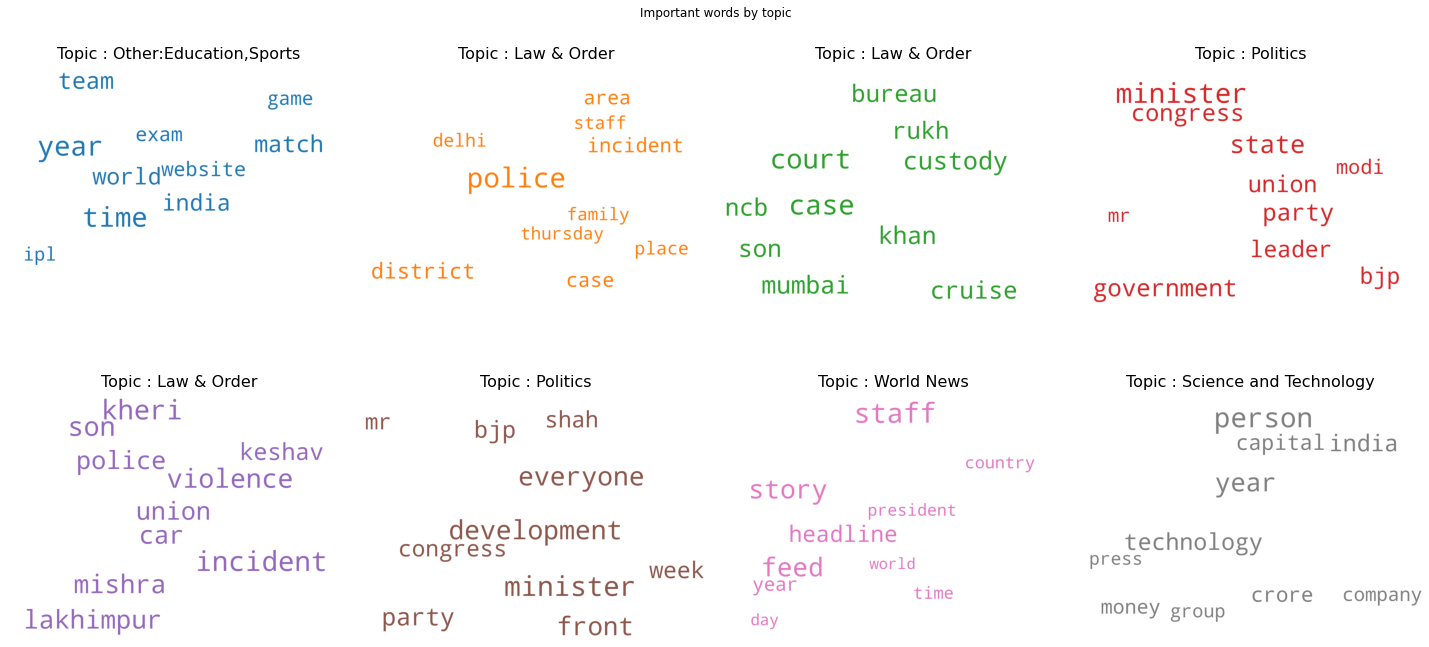

In [ ]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'
topic_moniker = ['Other:Education,Sports',"Law & Order","Law & Order","Politics","Law & Order","Politics","World News","Science and Technology"]

cloud = WordCloud(stopwords=stopwords_nltk,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 4, sharex=True, sharey=True)

fig.set_size_inches((20,10), forward= True)
plt.suptitle("Important words by topic")

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=200)
    plt.imshow(cloud)
    ax.set_title('Topic : ' + str(topic_moniker[i]), fontdict=dict(size=16))
    plt.axis('off')

plt.axis('off')
plt.tight_layout()

plt.show()


In [ ]:
topics_df[[i for i in range(0,n_topics)]]

,0,1,2,3,4,5,6,7
0,0.01,0.00,0.00,0.15,0.00,0.0,0.81,0.0
1,0.16,0.00,0.00,0.44,0.00,0.0,0.38,0.0
2,0.02,0.01,0.01,0.93,0.00,0.0,0.00,0.0
3,0.92,0.02,0.02,0.01,0.01,0.0,0.00,0.0
4,0.02,0.01,0.00,0.94,0.00,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...
1253,0.96,0.00,0.00,0.00,0.00,0.0,0.00,0.0
1254,0.96,0.00,0.00,0.00,0.00,0.0,0.00,0.0
1255,0.96,0.00,0.00,0.00,0.00,0.0,0.00,0.0
1256,0.00,0.00,0.97,0.00,0.00,0.0,0.00,0.0


In [ ]:
scraped_data["topic"] = topics_df["topic"]
scraped_data.head(2)

,text,url,title,content,bias,retweet_count,favorite_count,source_name,source,clean_content,text_lemmatized,clean_text_lemmatized,tags,polarity,polarity_score,subjectivity,subjectivity_score,topic
0,"RT @ndtvfeed: US Has Lost AI Battle To China, ...",https://www.ndtv.com/world-news/us-has-lost-ar...,"US Has Lost AI Battle To China, Pentagon's Ex-...",china has won the artificial intelligence batt...,0,5.0,0.0,ndtv,0,china artificial intelligence battle united st...,"[china, artificial, intelligence, battle, unit...",china artificial intelligence battle united he...,"[suspensions, dismissals and resignations, arm...",-0.023085,Negative,0.394306,Low subjectivity,6
1,"Karnataka Minister's Bizarre Remarks On ""Moder...",https://www.ndtv.com/india-news/karnataka-mini...,"Karnataka Minister's Bizarre Remarks On ""Moder...",karnataka health minister dr k sudhakar on sun...,0,13.0,71.0,ndtv,0,karnataka health minister dr k sudhakar claime...,"[karnataka, health, minister, dr, k, sudhakar,...",karnataka health minister dr k sudhakar claime...,[medicine and health],0.118816,Positive,0.452806,Low subjectivity,3


In [ ]:
t = topics_df[[i for i in range(0,n_topics)]]
t

,0,1,2,3,4,5,6,7
0,0.01,0.00,0.00,0.15,0.00,0.0,0.81,0.0
1,0.16,0.00,0.00,0.44,0.00,0.0,0.38,0.0
2,0.02,0.01,0.01,0.93,0.00,0.0,0.00,0.0
3,0.92,0.02,0.02,0.01,0.01,0.0,0.00,0.0
4,0.02,0.01,0.00,0.94,0.00,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...
1253,0.96,0.00,0.00,0.00,0.00,0.0,0.00,0.0
1254,0.96,0.00,0.00,0.00,0.00,0.0,0.00,0.0
1255,0.96,0.00,0.00,0.00,0.00,0.0,0.00,0.0
1256,0.00,0.00,0.97,0.00,0.00,0.0,0.00,0.0


In [ ]:
for index, item in topics_df.groupby(["topic"]):
    print("\n",index)
    for idx, stuff in item[:10].iterrows():
        print(stuff["title"])


 0
Petrol, Diesel Prices Hit New Highs. Check Latest Rates Here
One Of The Oldest Ramlila In Delhi Will Not Take Place This Year
Haj 2022 Process In India To Be 100% Digital: Union Minister
India, UK Agreed To Facilitate Travel For "Roadmap 2030": Foreign Minister
Will Cross 100-Crore Vaccine Mark Soon, CoWIN Platform Leading World: PM Modi
Mukesh Ambani Brings 7-Eleven Stores To India, First One In Mumbai
Brazil's Bolsonaro Barred From Football Match. Reason: Unvaccinated
Delhi Records Minimum Temperature Of 22.5 Degree Celsius
India, China Military Talks Collapse: "Chinese Side Wasn't Agreeable"
India, China Military Talks Collapse: "Chinese Side Wasn't Agreeable"

 1
Your Leaves Cancelled, UP Police To Staff Amid Farmers' Protest
Congress Leader Suffers Several Fractures In Rajasthan Mob Attack: Police
"Painful": Priyanka Gandhi Condemns Targeted Killings Of Kashmiris By Terrorists
Religious Places Reopen In Maharashtra, Chief Minister Uddhav Thackeray Visits Mumbai Temple
Trinamoo

In [ ]:
df2 = scraped_data.copy()
# df.Vader_Analysis = df.Vader_Analysis == "Positive"
df2["topic"] = df2["topic"].apply(lambda x: (topic_moniker[x]))
df2

,text,url,title,content,bias,retweet_count,favorite_count,source_name,source,clean_content,text_lemmatized,clean_text_lemmatized,tags,polarity,polarity_score,subjectivity,subjectivity_score,topic
0,"RT @ndtvfeed: US Has Lost AI Battle To China, ...",https://www.ndtv.com/world-news/us-has-lost-ar...,"US Has Lost AI Battle To China, Pentagon's Ex-...",china has won the artificial intelligence batt...,0,5.0,0.0,ndtv,0,china artificial intelligence battle united st...,"[china, artificial, intelligence, battle, unit...",china artificial intelligence battle united he...,"[suspensions, dismissals and resignations, arm...",-0.023085,Negative,0.394306,Low subjectivity,World News
1,"Karnataka Minister's Bizarre Remarks On ""Moder...",https://www.ndtv.com/india-news/karnataka-mini...,"Karnataka Minister's Bizarre Remarks On ""Moder...",karnataka health minister dr k sudhakar on sun...,0,13.0,71.0,ndtv,0,karnataka health minister dr k sudhakar claime...,"[karnataka, health, minister, dr, k, sudhakar,...",karnataka health minister dr k sudhakar claime...,[medicine and health],0.118816,Positive,0.452806,Low subjectivity,Politics
2,Agitation Will Continue Till Demands Are Met: ...,https://ndtv.com/india-news/agitation-will-con...,Agitation Will Continue Till Demands Are Met: ...,the farmers' agitation will continue till all ...,0,23.0,257.0,ndtv,0,farmers agitation continue till demands met re...,"[farmer, agitation, continue, till, demand, me...",farmer agitation continue till demand met repe...,"[agriculture, farmers]",0.062500,Positive,0.300000,Low subjectivity,Politics
3,"Petrol, Diesel Prices Hit New Highs https://t....",https://www.ndtv.com/business/petrol-and-diese...,"Petrol, Diesel Prices Hit New Highs. Check Lat...","petrol, diesel price today: petrol prices touc...",0,17.0,119.0,ndtv,0,petrol diesel price petrol prices touched high...,"[petrol, diesel, price, petrol, price, touched...",petrol diesel price petrol price touched high ...,"[oil (petroleum) and gasoline, prices (fares, ...",-0.012500,Negative,0.531250,High subjectivity,"Other:Education,Sports"
4,#MaharashtraBandh Today In Solidarity With Far...,https://www.ndtv.com/india-news/maharashtra-ba...,Maharashtra Bandh Live Updates: Bus Services A...,bus services were affected across maharashtra ...,0,21.0,78.0,ndtv,0,bus services affected maharashtra shops commer...,"[bus, service, affected, maharashtra, shop, co...",bus service affected maharashtra shop commerci...,[],-0.077778,Negative,0.233333,Low subjectivity,Politics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,T20 World Cup: Jos Buttler confident 'England ...,https://www.republicworld.com/sports-news/cric...,T20 World Cup: Jos Buttler Confident 'England ...,"englandâ€™s wicketkeeper batter, jos buttler h...",3,0.0,25.0,republictv,1,england wicketkeeper batter jos buttler englan...,"[england, wicketkeeper, batter, jos, buttler, ...",england wicketkeeper batter jos buttler englan...,[],0.233877,Positive,0.413043,Low subjectivity,"Other:Education,Sports"
1254,"ATL Space Challenge 2021: CBSE, ISRO team up t...",https://www.republicworld.com/india-news/educa...,"ATL Space Challenge 2021: CBSE, ISRO Team Up T...",atal innovation mission (aim) has started the ...,3,1.0,19.0,republictv,1,atal innovation mission aim started atl space ...,"[atal, innovation, mission, aim, started, atl,...",atal innovation mission aim started atl space ...,"[education and schools, computers and the inte...",0.123913,Positive,0.489907,Low subjectivity,"Other:Education,Sports"
1255,DU Admissions 2021: Online application for DU ...,https://www.republicworld.com/india-news/educa...,DU Admissions 2021: Online Application For DU ...,the delhi university will commence admissions ...,3,0.0,13.0,republictv,1,delhi university commence admissions cut list ...,"[delhi, university, commence, admission, cut, ...",delhi university commence admission cut list p...,"[education and schools, colleges and universit...",0.112190,Pos

In [ ]:
with open('/content/drive/MyDrive/project_data/final_data.pkl', 'wb') as fid:
     pickle.dump(df2, fid)